**Supermart Grocery Sales Retail Analytics**

Overview:

This project involves an in-depth analysis of the Supermart Grocery Sales dataset, which contains data on orders placed by customers on a grocery delivery application. The primary goal is to explore the data, uncover trends, and build a predictive model to forecast sales. The analysis focuses on understanding key sales drivers, profit margins, and the impact of discounts on customer behavior. The project also includes the development of a machine learning model to predict future sales.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df=pd.read_csv(r"X:\Unified Mentor\Project 3\Supermart Grocery Sales - Retail Analytics Dataset.csv")

In [5]:
train_df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [7]:
print("Rows: ",train_df.shape[0],",Columns: ",train_df.shape[1])

Rows:  9994 ,Columns:  11


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [11]:
train_df.dtypes

Order ID          object
Customer Name     object
Category          object
Sub Category      object
City              object
Order Date        object
Region            object
Sales              int64
Discount         float64
Profit           float64
State             object
dtype: object

In [13]:
train_df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [15]:
train_df.describe(include="all")

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
count,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994
unique,9994,50,7,23,24,1236,5,NaN,NaN,NaN,1
top,OD1,Amrish,Snacks,Health Drinks,Kanyakumari,09-05-2017,West,NaN,NaN,NaN,Tamil Nadu
freq,1,227,1514,719,459,38,3203,NaN,NaN,NaN,9994
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1496.596158,0.226817,374.937082,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,577.559036,0.074636,239.932881,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.000000,0.100000,25.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,0.160000,180.022500,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1498.000000,0.230000,320.780000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.750000,0.290000,525.627500,NaN


In [17]:
train_df.duplicated().sum()

0

By this we can say there are no duplicates in the data.

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [21]:
train_df['Order Date'] = pd.to_datetime(train_df['Order Date'], errors='coerce')

In [23]:
# Convert 'Order Date' to datetime
train_df['Order_Date'] = pd.to_datetime(train_df['Order Date'], errors='coerce')

In [25]:
# Extract year and month
train_df['Year'] = train_df['Order Date'].dt.year
train_df['Month'] = train_df['Order Date'].dt.month

Converting Order Date data type object to Date in order to analyse the data in time format.

In [27]:
train_df.drop(["Order Date"], axis= 1 , inplace= True)

In [29]:
train_df.head()

,Order ID,Customer Name,Category,Sub Category,City,Region,Sales,Discount,Profit,State,Order_Date,Year,Month
0,OD1,Harish,Oil & Masala,Masalas,Vellore,North,1254,0.12,401.28,Tamil Nadu,2017-11-08,2017.0,11.0
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,South,749,0.18,149.80,Tamil Nadu,2017-11-08,2017.0,11.0
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,West,2360,0.21,165.20,Tamil Nadu,2017-06-12,2017.0,6.0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,South,896,0.25,89.60,Tamil Nadu,2016-10-11,2016.0,10.0
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,South,2355,0.26,918.45,Tamil Nadu,2016-10-11,2016.0,10.0


In [31]:
#minimum datetime and maximum datetime
print("Starting Date: ",train_df['Order_Date'].min(),",Last Date: ", train_df['Order_Date'].max())

Starting Date:  2015-01-03 00:00:00 ,Last Date:  2018-12-11 00:00:00


In [33]:
# Sales Distribution by Category
sales_by_category = train_df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("Sales by Category:\n", sales_by_category)

Sales by Category:
 Category
Eggs, Meat & Fish    2267401
Snacks               2237546
Food Grains          2115272
Bakery               2112281
Fruits & Veggies     2100727
Beverages            2085313
Oil & Masala         2038442
Name: Sales, dtype: int64


Totally we are having 7 categories among them Eggs, Meat & Fish - 2267401 is having high sales and lowest sales are Oil & Masala - 2038442 .

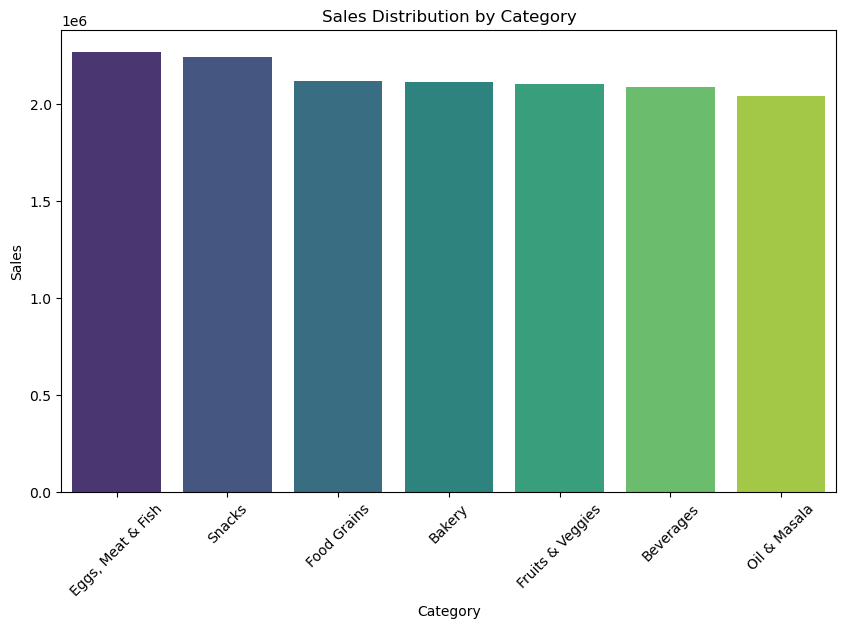

In [35]:
# Sales Distribution by Category
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette='viridis')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

By this we can see data visually that Eggs, Meat & Fish  having highest sales and Oil & Masala is having lowest sales among all categories .

In [37]:
# Sales Distribution by Sub Category
sales_by_subcategory = train_df.groupby('Sub Category')['Sales'].sum().sort_values(ascending=False)
print("Sales by Category:\n", sales_by_subcategory)

Sales by Category:
 Sub Category
Health Drinks         1051439
Soft Drinks           1033874
Cookies                768213
Breads & Buns          742586
Noodles                735435
Chocolates             733898
Masalas                697480
Cakes                  685612
Biscuits               684083
Spices                 672876
Edible Oil & Ghee      668086
Mutton                 611200
Eggs                   575156
Fish                   560548
Organic Staples        558929
Fresh Fruits           551212
Atta & Flour           534649
Fresh Vegetables       525842
Dals & Pulses          523371
Chicken                520497
Organic Vegetables     520271
Organic Fruits         503402
Rice                   498323
Name: Sales, dtype: int64


Now a days people are concentrating much so i think Health drinks are getting high sales we compared to other sub categories.

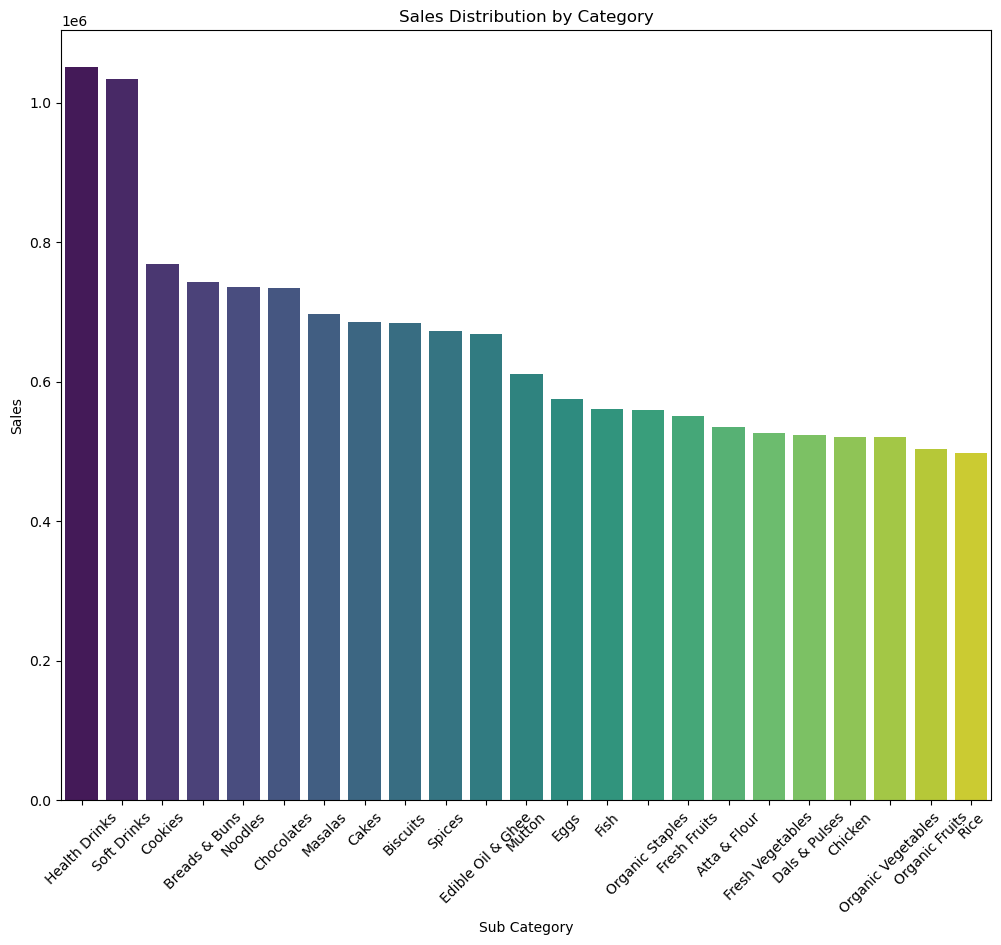

In [39]:
# Sales Distribution by Category
plt.figure(figsize=(12, 10))
sns.barplot(x=sales_by_subcategory.index, y=sales_by_subcategory.values, palette='viridis')
plt.title('Sales Distribution by Category')
plt.xlabel('Sub Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

This is visual representation of the sub category from this we can say Health drinks as Sogt drinks are having good sales among all sub categories and Organic Vegetables & Organic Fruits and Rice are having low sales .

In [41]:
# Sales Distribution by Category
sales_by_region = train_df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print("Sales by Region:\n", sales_by_region)

Sales by Region:
 Region
West       4798743
East       4248368
Central    3468156
South      2440461
North         1254
Name: Sales, dtype: int64


Totally we are having 5 regions among them West is high sales and north is very low sales.

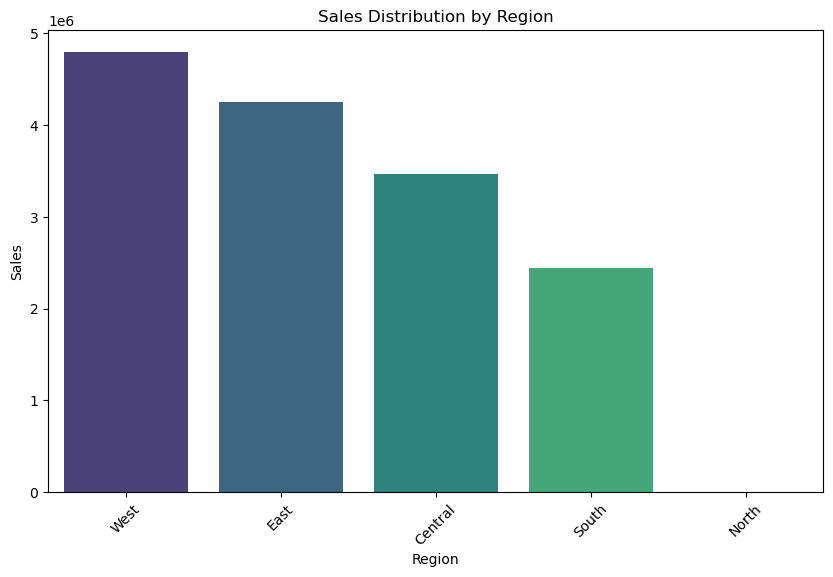

In [43]:
# Sales Distribution by Category
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette='viridis')
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

By this we can say there no proper sales in North.

In [45]:
#Yearly sales
yearly_sales = train_df.groupby('Year')['Sales'].sum().sort_values(ascending=False)
print("Yearly Sales:\n", yearly_sales)

Yearly Sales:
 Year
2018.0    2004606
2017.0    1611269
2016.0    1236970
2015.0    1200655
Name: Sales, dtype: int64


There is gradual increase in sales from 2015 to 2018.

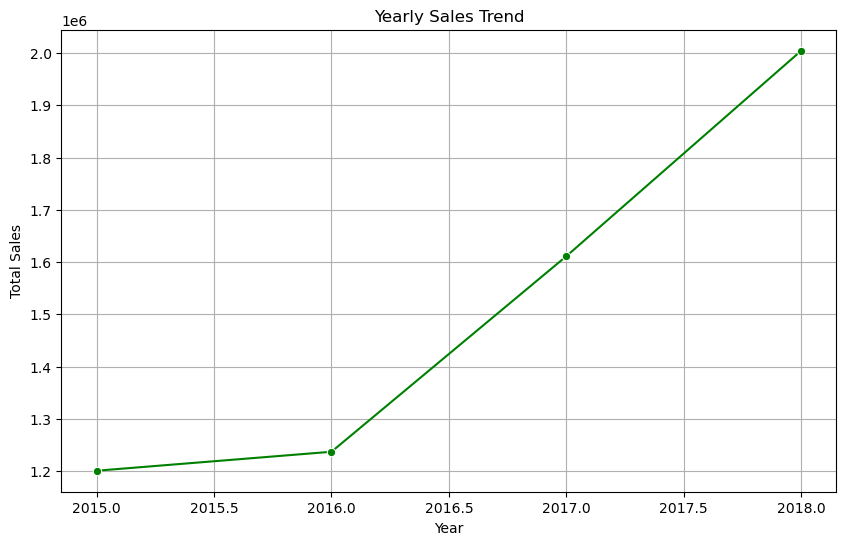

In [47]:
# Reset the index of yearly_sales to convert it to a DataFrame
yearly_sales_df = yearly_sales.reset_index()
yearly_sales_df.columns = ['Year', 'Sales']  # Rename columns for clarity

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Sales', data=yearly_sales_df, marker='o', color='g')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


From this representation we can see that there is low increase of sales from 2015 to 2016 , but from 2016 onwards there is huge increase sales for the products to 2018.

In [49]:
# Monthly Sales Trend
monthly_sales = train_df.groupby('Month')['Sales'].sum().reset_index()
print("Monthly Sales:\n", monthly_sales)

Monthly Sales:
     Month   Sales
0     1.0  175986
1     2.0  196874
2     3.0  371201
3     4.0  421442
4     5.0  390694
5     6.0  450453
6     7.0  412349
7     8.0  361569
8     9.0  884991
9    10.0  455396
10   11.0  932884
11   12.0  999661


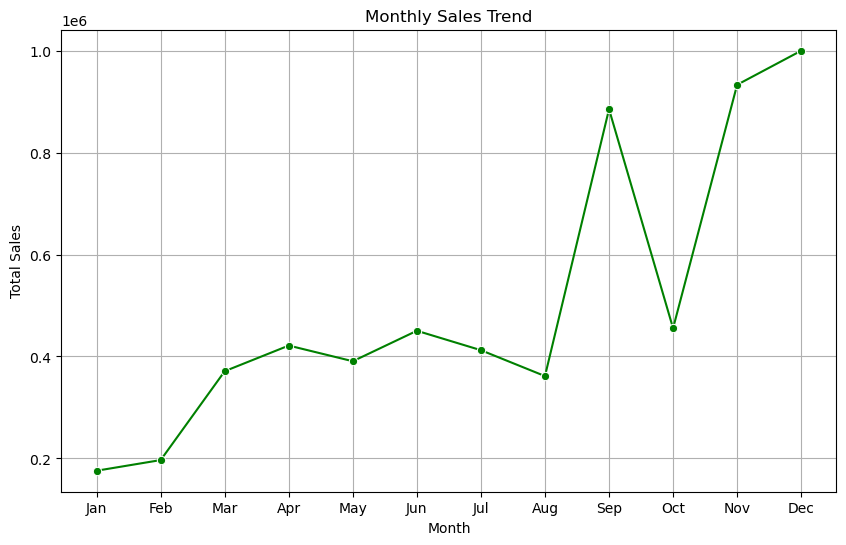

In [51]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sales', data=monthly_sales, marker='o', color='g')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

On the basis of month wise data we can say that from Jan to Apr there are good increase in sales and from Apr to May there is decrease in sales and there is increase from May to Jun there is slight increse but where as again decrease in sales from Jun to Aug . But from Aug to Sep there is drastic increase in sales and agai there is decrese in from Sep to Oct . And Again there is no decrese in sales.

So we nee to concentrate on Jan , Feb , Aug and Oct months to increse sales in Supermarket.

In [53]:
train_df.head()

,Order ID,Customer Name,Category,Sub Category,City,Region,Sales,Discount,Profit,State,Order_Date,Year,Month
0,OD1,Harish,Oil & Masala,Masalas,Vellore,North,1254,0.12,401.28,Tamil Nadu,2017-11-08,2017.0,11.0
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,South,749,0.18,149.80,Tamil Nadu,2017-11-08,2017.0,11.0
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,West,2360,0.21,165.20,Tamil Nadu,2017-06-12,2017.0,6.0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,South,896,0.25,89.60,Tamil Nadu,2016-10-11,2016.0,10.0
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,South,2355,0.26,918.45,Tamil Nadu,2016-10-11,2016.0,10.0


In [55]:
#Yearly Discount
yearly_discount = train_df.groupby('Year')['Discount'].sum().sort_values(ascending=False)
print("Yearly Discount:\n", yearly_discount)

Yearly Discount:
 Year
2018.0    297.90
2017.0    245.98
2016.0    188.01
2015.0    183.44
Name: Discount, dtype: float64


By seeing this we can say that as dicount on products increase yearly simultaneously we can see increase sales in the market.

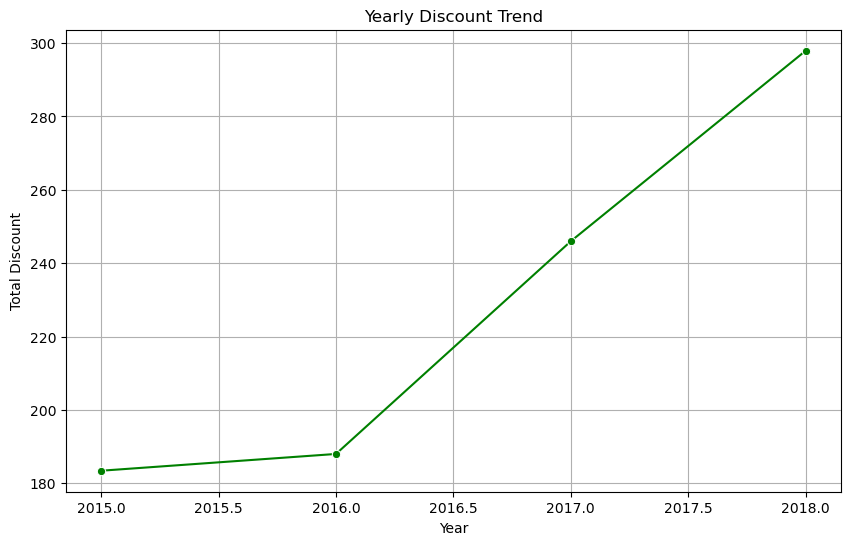

In [57]:
# Reset the index of yearly_sales to convert it to a DataFrame
yearly_discount_df = yearly_discount.reset_index()
yearly_discount_df.columns = ['Year', 'Discount']  # Rename columns for clarity

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Discount', data=yearly_discount_df, marker='o', color='g')
plt.title('Yearly Discount Trend')
plt.xlabel('Year')
plt.ylabel('Total Discount')
plt.grid(True)
plt.show()

Visual representation of dicount on yearly basis.

In [59]:
# Monthly Sales Trend
monthly_discount = train_df.groupby('Month')['Discount'].sum().reset_index()
print("Monthly Discount:\n", monthly_discount)

Monthly Discount:
     Month  Discount
0     1.0     27.50
1     2.0     29.40
2     3.0     55.64
3     4.0     63.05
4     5.0     61.07
5     6.0     66.85
6     7.0     61.30
7     8.0     56.09
8     9.0    132.05
9    10.0     69.84
10   11.0    141.14
11   12.0    151.40


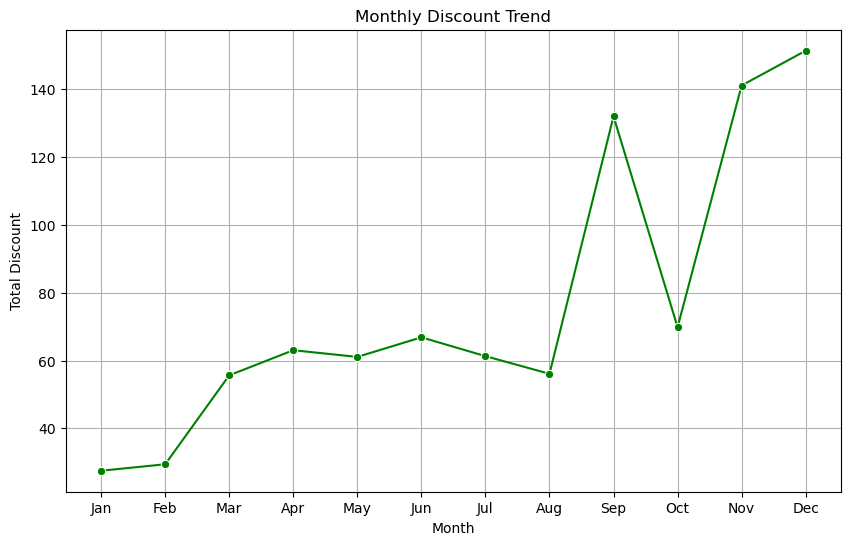

In [61]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Discount', data=monthly_discount, marker='o', color='g')
plt.title('Monthly Discount Trend')
plt.xlabel('Month')
plt.ylabel('Total Discount')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

This is much similar to sales graph so we need to increase discount on Jan , Fen , Aug and Oct month in order to increase sales.

In [63]:
#Yearly Profit
yearly_profit = train_df.groupby('Year')['Profit'].sum().sort_values(ascending=False)
print("Yearly Profit:\n", yearly_profit)

Yearly Profit:
 Year
2018.0    501027.64
2017.0    392920.64
2016.0    312507.17
2015.0    296603.58
Name: Profit, dtype: float64


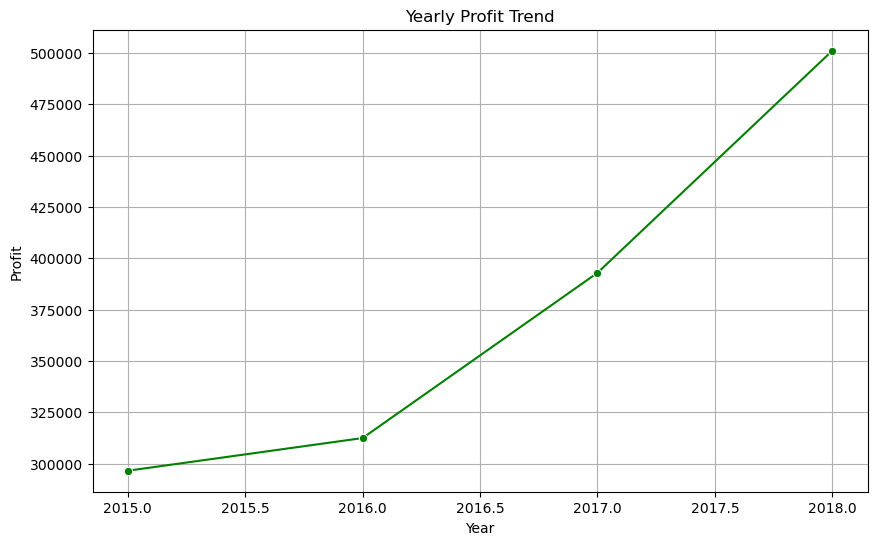

In [65]:
# Reset the index of yearly_sales to convert it to a DataFrame
yearly_profit_df = yearly_profit.reset_index()
yearly_profit_df.columns = ['Year', 'Profit']  # Rename columns for clarity

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Profit', data=yearly_profit_df, marker='o', color='g')
plt.title('Yearly Profit Trend')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

As the sales are increasing from 2015 to 2018 so the profit aslo increasing for supermart.

In [67]:
monthly_profit = train_df.groupby('Month')['Profit'].sum().reset_index()
print("Monthly Profit:\n", monthly_profit)

Monthly Profit:
     Month     Profit
0     1.0   43567.20
1     2.0   49315.33
2     3.0   91401.65
3     4.0  103406.47
4     5.0   93882.59
5     6.0  107098.21
6     7.0  107660.56
7     8.0   85320.71
8     9.0  217973.21
9    10.0  111356.19
10   11.0  239650.39
11   12.0  252426.52


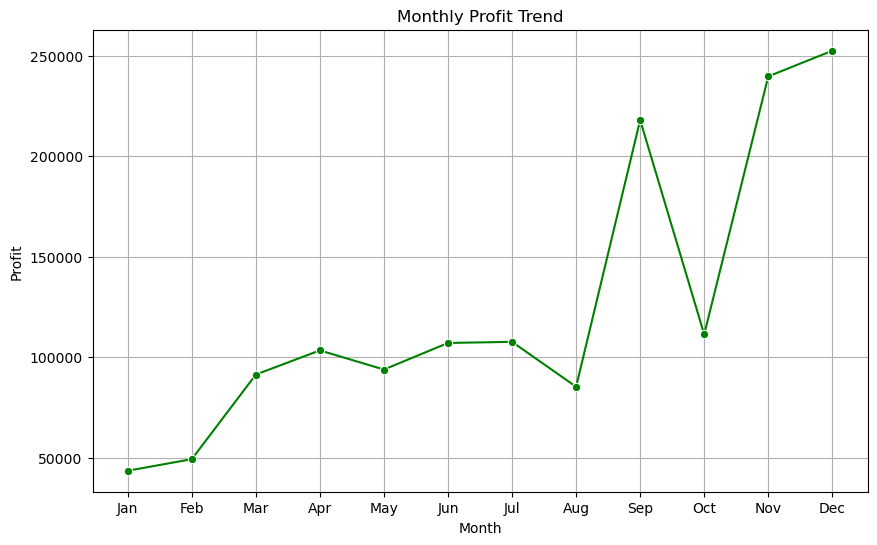

In [69]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Profit', data=monthly_profit, marker='o', color='g')
plt.title('Monthly Profit Trend')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

According to monthly sales the profit is also in those months it is good and In the month of Sep, Nov and Dec the profit is very high when compared to all other months.

Univariate Analysis:

Text(0.5, 1.0, 'Profit')

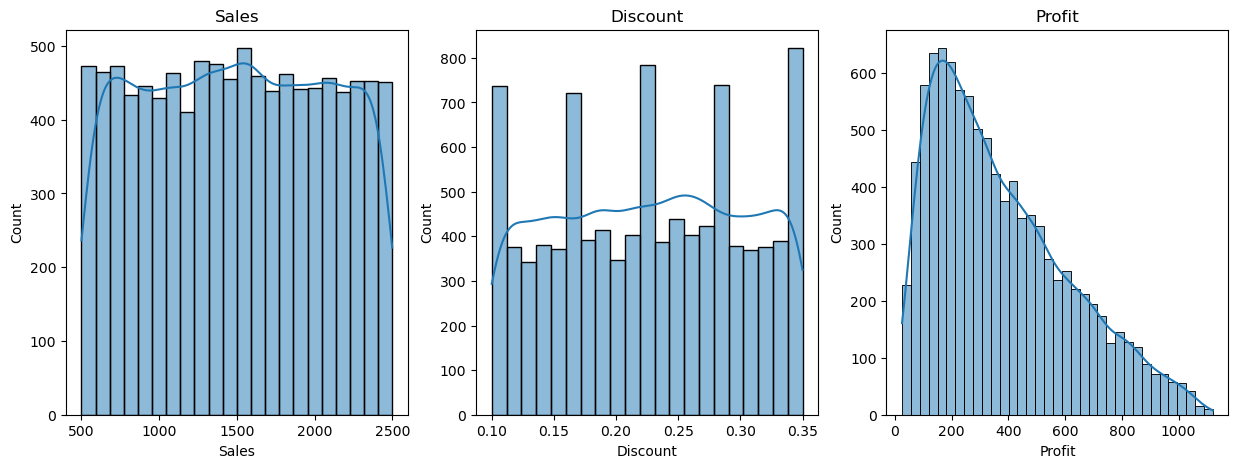

In [71]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(train_df["Sales"],kde=True)
plt.title("Sales")

plt.subplot(1, 3, 2)
sns.histplot(train_df["Discount"],kde=True)
plt.title("Discount")

plt.subplot(1, 3, 3)
sns.histplot(train_df["Profit"],kde=True)
plt.title("Profit")

Visual represenatation of Sales, Discount and Proft.

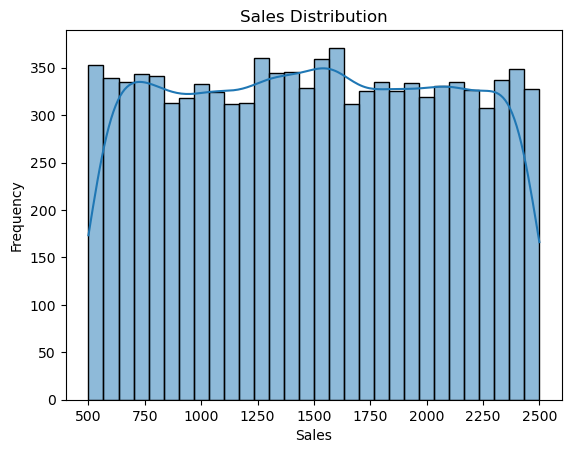

In [73]:
# Histogram for Sales
sns.histplot(train_df['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

The histogram illustrates the distribution of sales, with a relatively even spread across values, peaking slightly around 1500. The data shows a near-uniform frequency, indicating that sales values are fairly consistent within this range, with fewer occurrences at the lower and upper extremes.

Bivariate Analysis

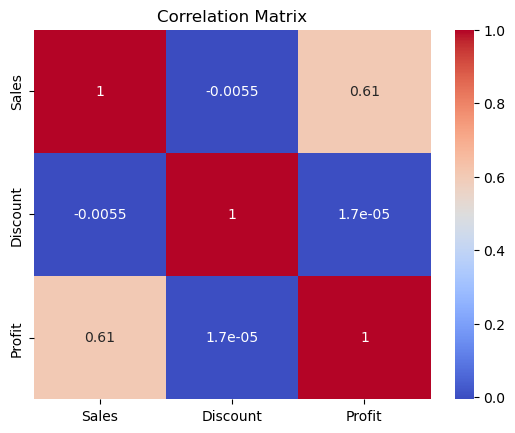

In [75]:
# Correlation Matrix
correlation_matrix = train_df[['Sales','Discount','Profit']].corr()  # Add other continuous or ordinal variables if available
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

By seeing this visual represenatation of Correlation matrix we can see how profit is effecting sales and discount and viceverse.

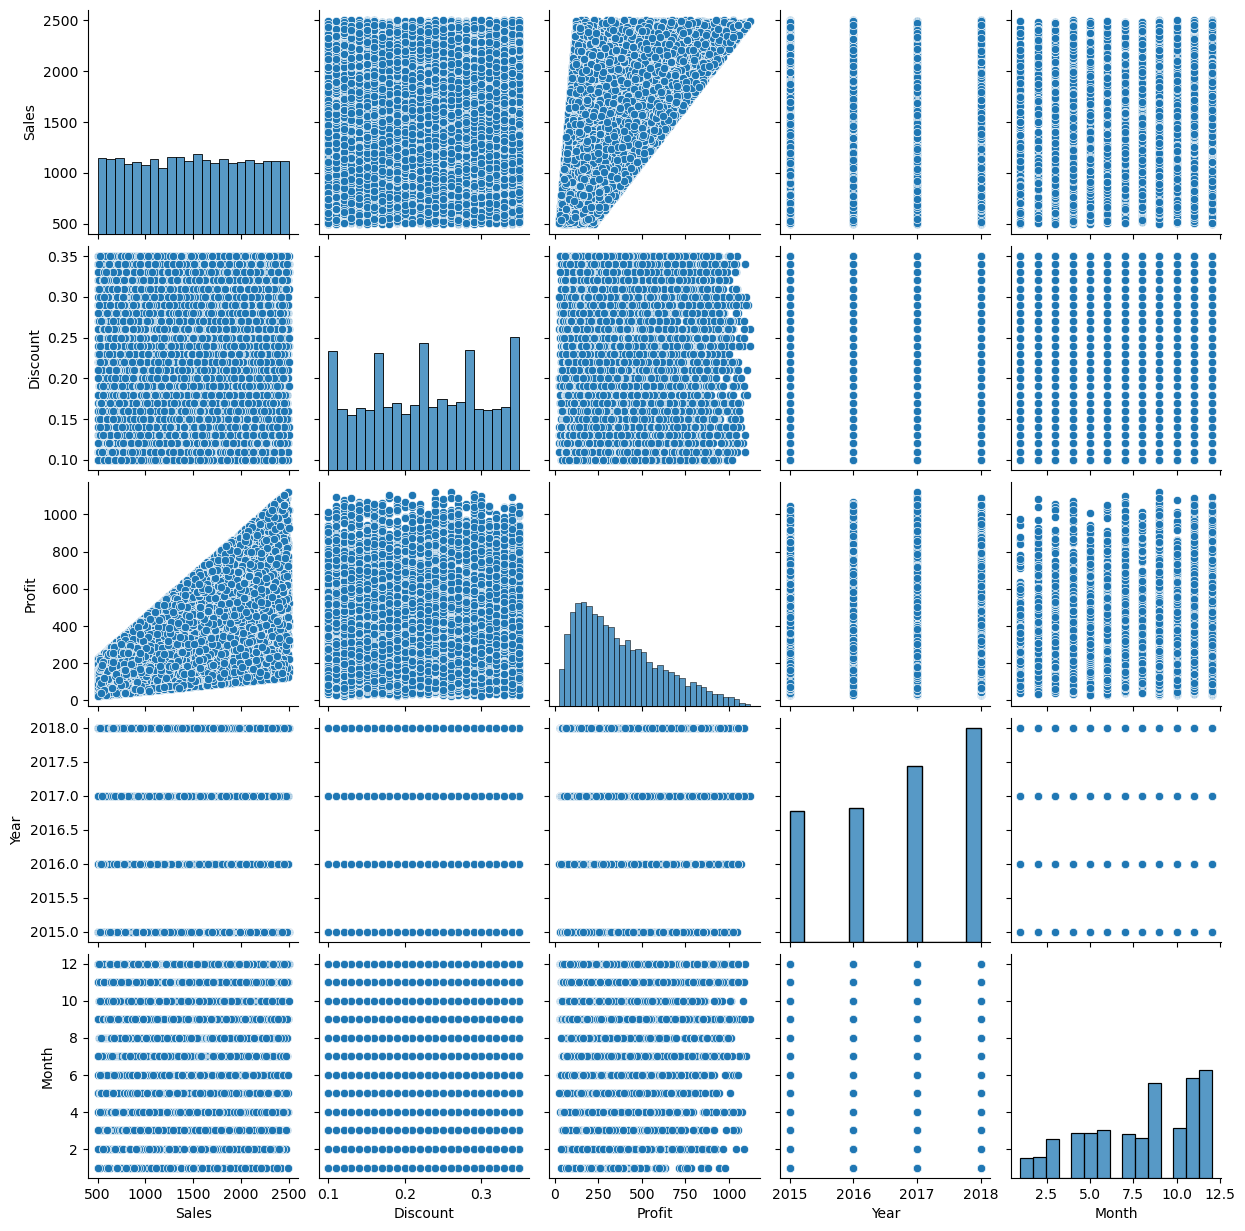

In [77]:
#Pairplots
sns.pairplot(data=train_df)

TIME SERIES ANALYSIS

In [79]:
train_df.head()

,Order ID,Customer Name,Category,Sub Category,City,Region,Sales,Discount,Profit,State,Order_Date,Year,Month
0,OD1,Harish,Oil & Masala,Masalas,Vellore,North,1254,0.12,401.28,Tamil Nadu,2017-11-08,2017.0,11.0
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,South,749,0.18,149.80,Tamil Nadu,2017-11-08,2017.0,11.0
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,West,2360,0.21,165.20,Tamil Nadu,2017-06-12,2017.0,6.0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,South,896,0.25,89.60,Tamil Nadu,2016-10-11,2016.0,10.0
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,South,2355,0.26,918.45,Tamil Nadu,2016-10-11,2016.0,10.0


In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [83]:
daily_sales = train_df.groupby('Order_Date').agg({'Sales': 'sum', 'Discount': 'sum', 'Profit': 'sum'}).reset_index()

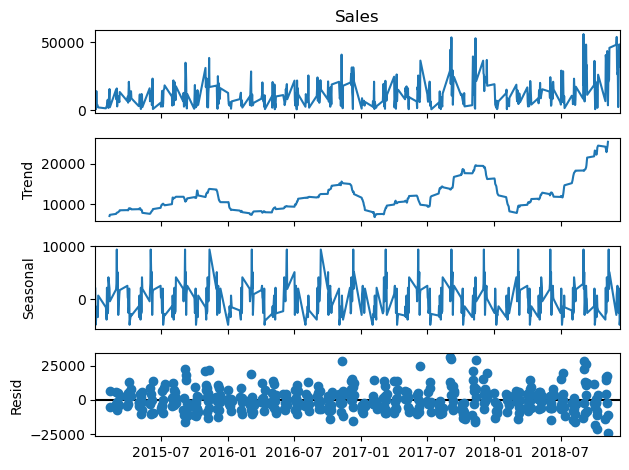

In [85]:
# Decompose the series
daily_sales.set_index('Order_Date', inplace=True)
result = seasonal_decompose(daily_sales['Sales'], model='additive', period=30)
result.plot()
plt.show()


By using this seasonal decomposition we can see Sales, trend, Seasonality and Resid . So that we can think where we need to concentarte much in order to increase sales and trenfd in the market for the supermart and Seasonality for the products in the supermart.

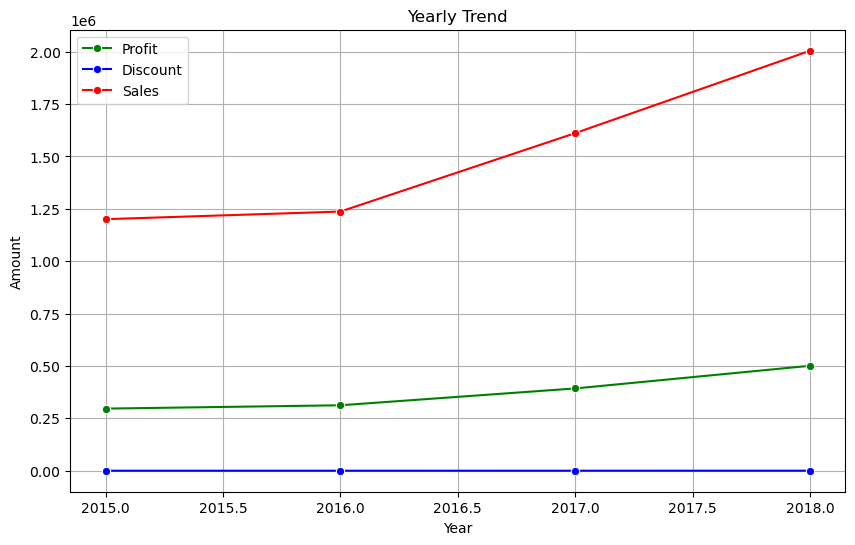

In [87]:
# Plot the data
plt.figure(figsize=(10, 6))

# Profit line plot
sns.lineplot(x='Year', y='Profit', data=yearly_profit_df, marker='o', color='g', label='Profit')

# Discount line plot
sns.lineplot(x='Year', y='Discount', data=yearly_discount_df, marker='o', color='b', label='Discount')

#Sales line plot
sns.lineplot(x='Year', y='Sales', data=yearly_sales_df, marker='o', color='r', label='Sales')
# Add labels, title, and grid
plt.title('Yearly Trend')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()  # Add a legend
plt.grid(True)
plt.show()


Here we can see the Yearly Trend  for Sales , DIscount and Profit.

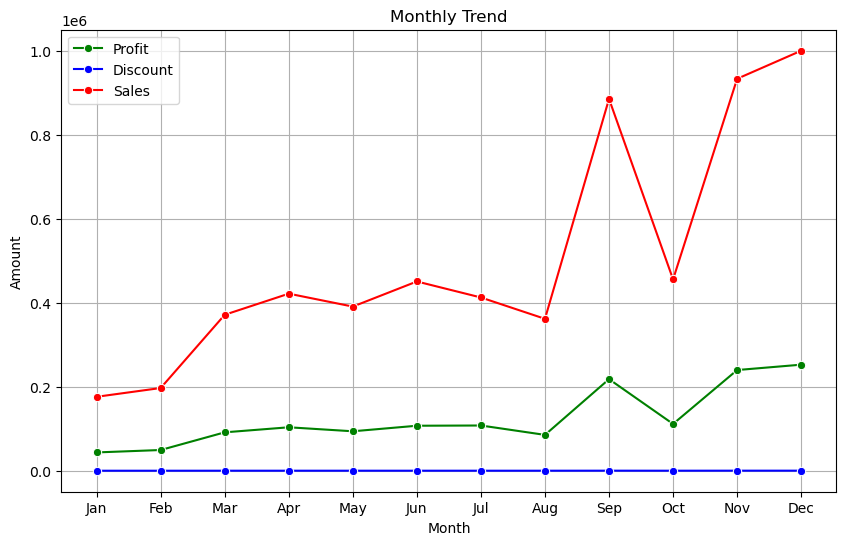

In [89]:
# Plot the data
plt.figure(figsize=(10, 6))

# Profit line plot
sns.lineplot(x='Month', y='Profit', data=monthly_profit, marker='o', color='g', label='Profit')

# Discount line plot
sns.lineplot(x='Month', y='Discount', data=monthly_discount, marker='o', color='b', label='Discount')

#Sales line plot
sns.lineplot(x='Month', y='Sales', data=monthly_sales, marker='o', color='r', label='Sales')
# Add labels, title, and grid
plt.title('Monthly Trend')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()  # Add a legend
plt.grid(True)
plt.show()


Here we can see the Monthly Trend  for Sales , DIscount and Profit.

Feature Engineering and Model Building

In [91]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [93]:
# Encode categorical variables
label_encoder = LabelEncoder()
train_df['Category'] = label_encoder.fit_transform(train_df['Category'])
train_df['Sub Category'] = label_encoder.fit_transform(train_df['Sub Category'])
train_df['City'] = label_encoder.fit_transform(train_df['City'])
train_df['Region'] = label_encoder.fit_transform(train_df['Region'])
train_df['State'] = label_encoder.fit_transform(train_df['State'])

In [95]:
features = train_df[['Category', 'Sub Category', 'City', 'Region', 'State', 'Discount', 'Month', 'Year']]
target = train_df['Sales']

In [97]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [99]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [101]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Linaer Regression**

In [103]:
# Model Building - Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [105]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 330992.7980814799
R-squared: -0.0035661984126693635


In [107]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Model Performance:
Mean Absolute Error (MAE): 496.98938818913155
Mean Squared Error (MSE): 330992.7980814799
Root Mean Squared Error (RMSE): 575.3197355223267
R-squared (R2): -0.0035661984126693635


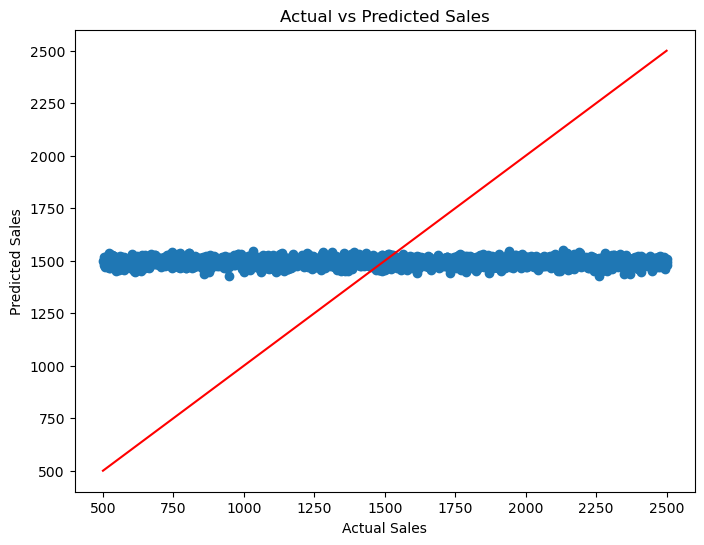

In [109]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test),max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


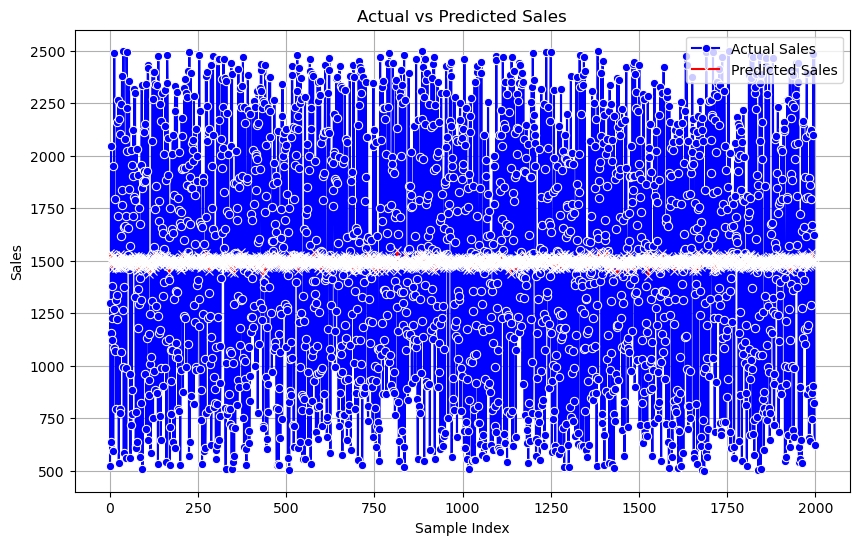

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to hold Actual and Predicted Sales
results_df = pd.DataFrame({
    'Actual Sales': y_test,
    'Predicted Sales': y_pred
}).reset_index(drop=True)

# Plot Actual vs Predicted Sales
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x=range(len(results_df)), y='Actual Sales', label='Actual Sales', marker='o', color='b')
sns.lineplot(data=results_df, x=range(len(results_df)), y='Predicted Sales', label='Predicted Sales', marker='x', color='r')

# Add titles and labels
plt.title('Actual vs Predicted Sales')
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

**Random Forest**

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [116]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 383285.1891937936
R-squared: -0.16211610179024816


In [119]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Model Performance:
Mean Absolute Error (MAE): 527.7599736673893
Mean Squared Error (MSE): 383285.1891937936
Root Mean Squared Error (RMSE): 619.1003062459213
R-squared (R2): -0.16211610179024816


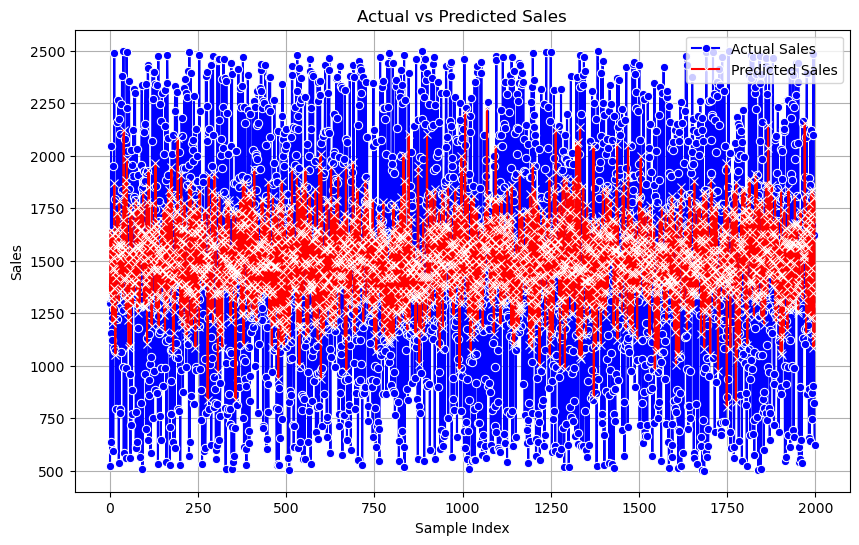

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to hold Actual and Predicted Sales
results_df = pd.DataFrame({
    'Actual Sales': y_test,
    'Predicted Sales': y_pred
}).reset_index(drop=True)

# Plot Actual vs Predicted Sales
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x=range(len(results_df)), y='Actual Sales', label='Actual Sales', marker='o', color='b')
sns.lineplot(data=results_df, x=range(len(results_df)), y='Predicted Sales', label='Predicted Sales', marker='x', color='r')

# Add titles and labels
plt.title('Actual vs Predicted Sales')
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


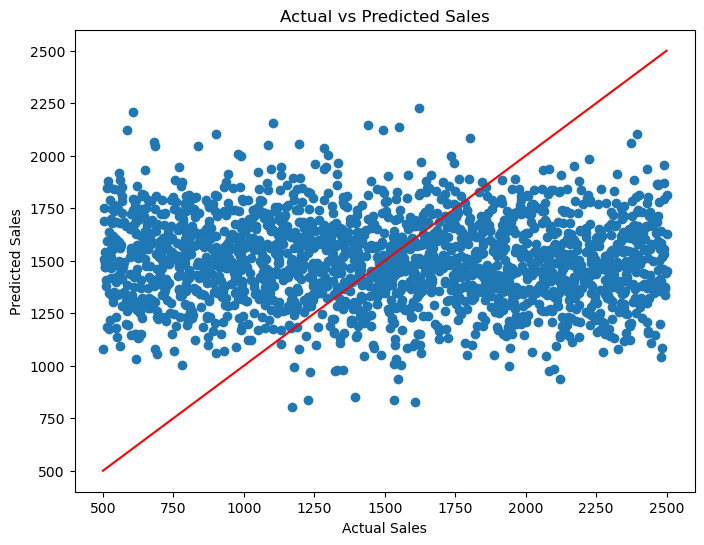

In [123]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test),max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [125]:
feature_importance = pd.Series(rf_model.feature_importances_, index=features.columns).sort_values(ascending=False)
print(feature_importance)


City            0.256783
Discount        0.232212
Sub Category    0.161264
Region          0.110038
Month           0.097534
Category        0.077397
Year            0.064771
State           0.000000
dtype: float64


From we can feature importance for all features(columns) and City is having highest importance for Sales in Supermart.

So City plays key role for increasing sales.

In [127]:
train_df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Region', 'Sales', 'Discount', 'Profit', 'State', 'Order_Date', 'Year',
       'Month'],
      dtype='object')

Hypothesis Testing

Hypothesis: Does the average profit differ across categories?

𝐻0​ : The average profit is the same across categories.

𝐻𝑎: The average profit differs across categories.

Test: One-way ANOVA.

In [129]:
import pandas as pd
from scipy.stats import f_oneway

# Load your data (replace with your dataset)
# Assuming train_df contains columns: 'Category' and 'Profit'
df = train_df.copy()

# Group data by Category and extract profits
category_profits = [group['Profit'].values for _, group in df.groupby('Category')]

# Perform one-way ANOVA test
f_stat, p_value = f_oneway(*category_profits)

# Results
print("One-Way ANOVA Test for Average Profit Across Categories")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average profit differs across categories.")
else:
    print("Fail to reject the null hypothesis: The average profit is the same across categories.")


One-Way ANOVA Test for Average Profit Across Categories
F-statistic: 0.53
P-value: 0.7832
Fail to reject the null hypothesis: The average profit is the same across categories.


By this we can say that The average profit is the same across categories.

Sub Category

Hypothesis: Does the discount rate affect sales differently across subcategories?

𝐻0: Discount rate has the same effect on sales for all subcategories.

𝐻𝑎: Discount rate has different effects on sales across subcategories.

Test: Two-way ANOVA (interaction effect between discount and subcategory

In [131]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load your data (replace with your dataset)
# Assuming train_df contains columns: 'Sub Category', 'Discount', and 'Sales'
df = train_df.copy()

# Ensure relevant columns are in the correct format
df['Sub Category'] = df['Sub Category'].astype('category')
df['Discount'] = df['Discount'].astype(float)
df['Sales'] = df['Sales'].astype(float)

# Rename column to avoid issues with spaces or special characters
df = df.rename(columns={'Sub Category': 'Sub_Category'})

# Update the formula to use the renamed column
formula = 'Sales ~ C(Sub_Category) * Discount'

# Fit the model
model = ols(formula, data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA

# Display the results
print("Two-Way ANOVA with Interaction Effect")
print(anova_table)

# Interpret the interaction term
p_value_interaction = anova_table.loc['C(Sub_Category):Discount', 'PR(>F)']
alpha = 0.05
if p_value_interaction < alpha:
    print("\nReject the null hypothesis: The discount rate affects sales differently across subcategories.")
else:
    print("\nFail to reject the null hypothesis: The discount rate has the same effect on sales for all subcategories.")


Two-Way ANOVA with Interaction Effect
                                sum_sq      df         F    PR(>F)
C(Sub_Category)           5.215739e+06    22.0  0.709652  0.834486
Discount                  1.012911e+05     1.0  0.303196  0.581898
C(Sub_Category):Discount  4.686261e+06    22.0  0.637612  0.900352
Residual                  3.323406e+09  9948.0       NaN       NaN

Fail to reject the null hypothesis: The discount rate has the same effect on sales for all subcategories.


City
Hypothesis: Do cities with higher sales have significantly higher profits?

𝐻0: Cities with higher sales have the same profit margins as others.

𝐻𝑎: Cities with higher sales have significantly higher profit margins.

Test: Pearson or Spearman correlation.

In [133]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

# Load your data (replace with your dataset)
# Assuming train_df contains columns: 'City', 'Sales', and 'Profit'
df = train_df.copy()

# Group data by 'City' and calculate total Sales and Profit for each city
city_stats = df.groupby('City').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Calculate Pearson correlation
pearson_corr, pearson_p = pearsonr(city_stats['Sales'], city_stats['Profit'])

# Calculate Spearman correlation
spearman_corr, spearman_p = spearmanr(city_stats['Sales'], city_stats['Profit'])

# Display results
print("Correlation between Sales and Profit Across Cities:")
print(f"Pearson Correlation: {pearson_corr:.4f}, P-value: {pearson_p:.4f}")
print(f"Spearman Correlation: {spearman_corr:.4f}, P-value: {spearman_p:.4f}")

# Interpretation
alpha = 0.05
if pearson_p < alpha:
    print("\nPearson: Reject the null hypothesis. Cities with higher sales have significantly higher profits.")
else:
    print("\nPearson: Fail to reject the null hypothesis. No significant relationship between sales and profits.")

if spearman_p < alpha:
    print("Spearman: Reject the null hypothesis. Cities with higher sales have significantly higher profits.")
else:
    print("Spearman: Fail to reject the null hypothesis. No significant relationship. ")


Correlation between Sales and Profit Across Cities:
Pearson Correlation: 0.9562, P-value: 0.0000
Spearman Correlation: 0.9600, P-value: 0.0000

Pearson: Reject the null hypothesis. Cities with higher sales have significantly higher profits.
Spearman: Reject the null hypothesis. Cities with higher sales have significantly higher profits.


Region
Hypothesis: Is there a significant difference in average sales across regions?

𝐻 0: The average sales are the same across all regions.

𝐻𝑎: The average sales differ across regions.

Test: One-way ANOVA.


In [135]:
import pandas as pd
from scipy.stats import f_oneway

# Load your data (replace with your dataset)
# Assuming train_df contains columns: 'Region' and 'Sales'
df = train_df.copy()

# Group data by Region and extract Sales values for each region
region_sales = [group['Sales'].values for _, group in df.groupby('Region')]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*region_sales)

# Results
print("One-Way ANOVA Test for Average Sales Across Regions")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average sales differ across regions.")
else:
    print("Fail to reject the null hypothesis: The average sales are the same across all regions.")


One-Way ANOVA Test for Average Sales Across Regions
F-statistic: 0.27
P-value: 0.9002
Fail to reject the null hypothesis: The average sales are the same across all regions.


Discount
Hypothesis: Does a higher discount percentage lead to higher sales?

𝐻 0 : There is no relationship between discount percentage and sales.

𝐻 𝑎: Higher discounts lead to higher sales.

Test: Linear regression or Pearson correlation.


In [137]:
import pandas as pd
from scipy.stats import pearsonr
import statsmodels.api as sm

# Load your data (replace with your dataset)
# Assuming train_df contains columns: 'Sales' and 'Discount'
df = train_df.copy()

# Linear Regression
# Add constant to the model for the intercept
X = sm.add_constant(df['Discount'])  # Add intercept
y = df['Sales']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the model summary
print("Linear Regression Model Summary:")
print(model.summary())

# Pearson Correlation
correlation, p_value_corr = pearsonr(df['Discount'], df['Sales'])

print("\nPearson Correlation Results:")
print(f"Pearson Correlation: {correlation:.4f}, P-value: {p_value_corr:.4f}")

# Interpretation of Pearson Correlation
alpha = 0.05
if p_value_corr < alpha:
    print("\nReject the null hypothesis: There is a significant relationship between discount and sales.")
else:
    print("\nFail to reject the null hypothesis: There is no significant relationship between discount and sales.")


Linear Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3036
Date:                Thu, 20 Mar 2025   Prob (F-statistic):              0.582
Time:                        17:02:14   Log-Likelihood:                -77730.
No. Observations:                9994   AIC:                         1.555e+05
Df Residuals:                    9992   BIC:                         1.555e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1506.27

Profit
Hypothesis: Is the average profit per order significantly different for categories with high discounts vs. low discounts?

𝐻0: The average profit is the same for high and low discount categories.

𝐻𝑎: The average profit is different for high and low discount categories.

Test: Two-sample t-test.


In [139]:
import pandas as pd
from scipy.stats import ttest_ind

# Load your data (replace with your dataset)
# Assuming train_df contains columns: 'Sales', 'Profit', 'Discount'
df = train_df.copy()

# Define the threshold for high and low discounts (e.g., median of the discount column)
threshold = df['Discount'].median()

# Create two groups based on the discount threshold
high_discount = df[df['Discount'] > threshold]
low_discount = df[df['Discount'] <= threshold]

# Perform a two-sample t-test for the profit between high and low discount groups
t_stat, p_value = ttest_ind(high_discount['Profit'], low_discount['Profit'])

# Results
print("Two-Sample T-Test Results:")
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: The average profit is different for high and low discount categories.")
else:
    print("\nFail to reject the null hypothesis: The average profit is the same for high and low discount categories.")


Two-Sample T-Test Results:
T-statistic: 0.27, P-value: 0.7873

Fail to reject the null hypothesis: The average profit is the same for high and low discount categories.


There are some of the Hypothesis Testing.

**BUSINESS INSIGHTS:**

1. This analysis helps understand the sales trends, category performance, and the impact of discounts on profit.

2. The top-performing categories are 'Eggs, Meat & Fish', 'Snacks', and 'Fruits & Veggies'.

3. Sales have shown consistent growth over the years, with a significant increase in 2018.

4. The correlation between profit and discount is minimal, suggesting that discounts do not significantly impact profit margins.

5. The linear regression model achieved an R-squared value of -0.0024240538359081576, indicating the proportion of variance explained by the model.

6. The random forest regression model achieved an R-squared value of -0.16211610179024816, indicating the proportion of variance explained by the model.